<a href="https://colab.research.google.com/github/Peace-Adetunmibi/peace/blob/main/DFT_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install numpy pandas scikit-learn matplotlib seaborn

In [4]:
import pandas as pd
import numpy as np

# --- Create a Synthetic DFT Dataset ---
# In a real scenario, this data would come from actual DFT calculations.
data = {
    'Compound': ['NaCl', 'SiC', 'AlP', 'GaAs', 'LiF', 'MgO', 'KBr', 'CsCl', 'ZnS', 'BN',
                 'GaN', 'InAs', 'CdTe', 'BeO', 'CaS', 'RbI', 'SrSe', 'BaTe', 'AgCl', 'CuBr'],
    # Target variable: Formation Energy (in eV/atom).
    # More negative values mean more stable compounds.
    'FormationEnergy_eV_atom': [-3.54, -0.68, -0.87, -0.37, -6.34, -3.12, -3.32, -4.56, -1.05, -2.65,
                                -0.98, -0.29, -0.52, -5.78, -2.45, -3.40, -2.61, -1.95, -1.32, -1.09]
}

df = pd.DataFrame(data)

# Split the 'Compound' column into Element A and Element B
df[['ElementA', 'ElementB']] = df['Compound'].str.extract(r'([A-Z][a-z]?)(\w+)')

print("--- Initial Dataset ---")
print(df.head())

--- Initial Dataset ---
  Compound  FormationEnergy_eV_atom ElementA ElementB
0     NaCl                    -3.54       Na       Cl
1      SiC                    -0.68       Si        C
2      AlP                    -0.87       Al        P
3     GaAs                    -0.37       Ga       As
4      LiF                    -6.34       Li        F


In [5]:
# --- Feature Engineering ---
# Create a dictionary of elemental properties. This is our "knowledge base".
elemental_properties = {
    'H': {'group': 1, 'period': 1, 'atomic_radius': 53, 'electronegativity': 2.20}, 'He': {'group': 18, 'period': 1, 'atomic_radius': 31, 'electronegativity': 0.0},
    'Li': {'group': 1, 'period': 2, 'atomic_radius': 167, 'electronegativity': 0.98}, 'Be': {'group': 2, 'period': 2, 'atomic_radius': 112, 'electronegativity': 1.57},
    'B': {'group': 13, 'period': 2, 'atomic_radius': 87, 'electronegativity': 2.04}, 'C': {'group': 14, 'period': 2, 'atomic_radius': 67, 'electronegativity': 2.55},
    'N': {'group': 15, 'period': 2, 'atomic_radius': 56, 'electronegativity': 3.04}, 'O': {'group': 16, 'period': 2, 'atomic_radius': 48, 'electronegativity': 3.44},
    'F': {'group': 17, 'period': 2, 'atomic_radius': 42, 'electronegativity': 3.98}, 'Ne': {'group': 18, 'period': 2, 'atomic_radius': 38, 'electronegativity': 0.0},
    'Na': {'group': 1, 'period': 3, 'atomic_radius': 190, 'electronegativity': 0.93}, 'Mg': {'group': 2, 'period': 3, 'atomic_radius': 145, 'electronegativity': 1.31},
    'Al': {'group': 13, 'period': 3, 'atomic_radius': 118, 'electronegativity': 1.61}, 'Si': {'group': 14, 'period': 3, 'atomic_radius': 111, 'electronegativity': 1.90},
    'P': {'group': 15, 'period': 3, 'atomic_radius': 98, 'electronegativity': 2.19}, 'S': {'group': 16, 'period': 3, 'atomic_radius': 88, 'electronegativity': 2.58},
    'Cl': {'group': 17, 'period': 3, 'atomic_radius': 79, 'electronegativity': 3.16}, 'Ar': {'group': 18, 'period': 3, 'atomic_radius': 71, 'electronegativity': 0.0},
    'K': {'group': 1, 'period': 4, 'atomic_radius': 243, 'electronegativity': 0.82}, 'Ca': {'group': 2, 'period': 4, 'atomic_radius': 194, 'electronegativity': 1.00},
    'Ga': {'group': 13, 'period': 4, 'atomic_radius': 136, 'electronegativity': 1.81}, 'Ge': {'group': 14, 'period': 4, 'atomic_radius': 125, 'electronegativity': 2.01},
    'As': {'group': 15, 'period': 4, 'atomic_radius': 114, 'electronegativity': 2.18}, 'Se': {'group': 16, 'period': 4, 'atomic_radius': 103, 'electronegativity': 2.55},
    'Br': {'group': 17, 'period': 4, 'atomic_radius': 94, 'electronegativity': 2.96}, 'Kr': {'group': 18, 'period': 4, 'atomic_radius': 88, 'electronegativity': 3.0},
    'Rb': {'group': 1, 'period': 5, 'atomic_radius': 265, 'electronegativity': 0.82}, 'Sr': {'group': 2, 'period': 5, 'atomic_radius': 219, 'electronegativity': 0.95},
    'In': {'group': 13, 'period': 5, 'atomic_radius': 156, 'electronegativity': 1.78}, 'Sn': {'group': 14, 'period': 5, 'atomic_radius': 145, 'electronegativity': 1.96},
    'Te': {'group': 16, 'period': 5, 'atomic_radius': 128, 'electronegativity': 2.1}, 'I': {'group': 17, 'period': 5, 'atomic_radius': 115, 'electronegativity': 2.66},
    'Cs': {'group': 1, 'period': 6, 'atomic_radius': 298, 'electronegativity': 0.79}, 'Ba': {'group': 2, 'period': 6, 'atomic_radius': 253, 'electronegativity': 0.89},
    'Zn': {'group': 12, 'period': 4, 'atomic_radius': 131, 'electronegativity': 1.65}, 'Cd': {'group': 12, 'period': 5, 'atomic_radius': 148, 'electronegativity': 1.69},
    'Ag': {'group': 11, 'period': 5, 'atomic_radius': 144, 'electronegativity': 1.93}, 'Cu': {'group': 11, 'period': 4, 'atomic_radius': 128, 'electronegativity': 1.90}
}


# Function to map element symbol to its properties
def get_features(element_symbol):
    return elemental_properties[element_symbol]

# Apply the function to create feature columns
df['propsA'] = df['ElementA'].apply(get_features)
df['propsB'] = df['ElementB'].apply(get_features)

# Expand the dictionaries into separate columns
df_propsA = df['propsA'].apply(pd.Series).add_suffix('_A')
df_propsB = df['propsB'].apply(pd.Series).add_suffix('_B')

# Combine everything into a final ML-ready dataframe
ml_df = pd.concat([df, df_propsA, df_propsB], axis=1)

# Create interaction features - these often capture the chemistry well!
# For example, the difference in electronegativity is key to ionic bonding.
ml_df['electronegativity_diff'] = abs(ml_df['electronegativity_A'] - ml_df['electronegativity_B'])
ml_df['atomic_radius_sum'] = ml_df['atomic_radius_A'] + ml_df['atomic_radius_B']

# Drop temporary and non-numeric columns
ml_df = ml_df.drop(columns=['Compound', 'ElementA', 'ElementB', 'propsA', 'propsB'])

print("\n--- ML-Ready DataFrame with Features ---")
print(ml_df.head())


--- ML-Ready DataFrame with Features ---
   FormationEnergy_eV_atom  group_A  period_A  atomic_radius_A  \
0                    -3.54      1.0       3.0            190.0   
1                    -0.68     14.0       3.0            111.0   
2                    -0.87     13.0       3.0            118.0   
3                    -0.37     13.0       4.0            136.0   
4                    -6.34      1.0       2.0            167.0   

   electronegativity_A  group_B  period_B  atomic_radius_B  \
0                 0.93     17.0       3.0             79.0   
1                 1.90     14.0       2.0             67.0   
2                 1.61     15.0       3.0             98.0   
3                 1.81     15.0       4.0            114.0   
4                 0.98     17.0       2.0             42.0   

   electronegativity_B  electronegativity_diff  atomic_radius_sum  
0                 3.16                    2.23              269.0  
1                 2.55                    0.65      

In [6]:
from sklearn.model_selection import train_test_split

In [11]:
# Define the target variable
y= ml_df['FormationEnergy_eV_atom']

# Define  the features
X = ml_df.drop(columns=['FormationEnergy_eV_atom'])

# Split data
X_train,X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state= 42)
print(f"\n Training set size: {len(X_train)} samples")
print(f" Test set size: {len(X_test)} samples")


 Training set size: 16 samples
 Test set size: 4 samples


In [12]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the model. n_estimators is the number of trees in the forest.
# random_state ensures reproducibility of results.
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model on the training data
model.fit(X_train, y_train)

print("\nModel training complete!")


Model training complete!


In [13]:
from sklearn.metrics import mean_absolute_error, r2_score

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate performance metrics
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\n--- Model Evaluation on Test Set ---")
print(f"Mean Absolute Error (MAE): {mae:.3f} eV/atom")
print(f"R-squared (R2) Score: {r2:.3f}")

# Interpretation:
# MAE: On average, our model's prediction is off by about {mae:.3f} eV/atom.
# R2: Our model explains {r2*100:.1f}% of the variance in the formation energy.


--- Model Evaluation on Test Set ---
Mean Absolute Error (MAE): 0.262 eV/atom
R-squared (R2) Score: 0.932


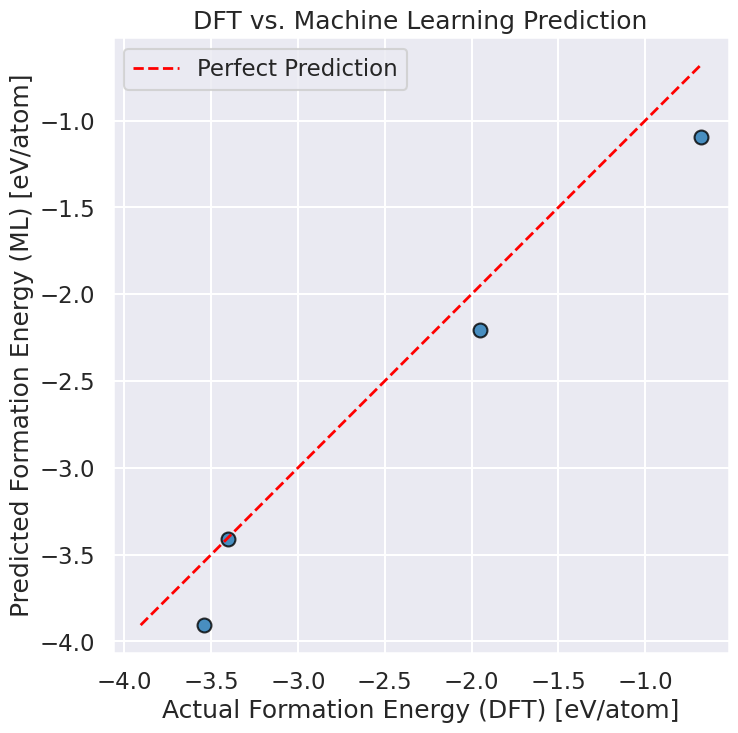

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_context('talk')
sns.set_style('darkgrid')

plt.figure(figsize=(8, 8))
plt.scatter(y_test, y_pred, alpha=0.8, s=100, edgecolors='k')
# Plot the ideal y=x line
perfect_line = np.linspace(min(y_test.min(), y_pred.min()),
                           max(y_test.max(), y_pred.max()), 100)
plt.plot(perfect_line, perfect_line, 'r--', linewidth=2, label='Perfect Prediction')

plt.xlabel("Actual Formation Energy (DFT) [eV/atom]")
plt.ylabel("Predicted Formation Energy (ML) [eV/atom]")
plt.title("DFT vs. Machine Learning Prediction")
plt.legend()
plt.gca().set_aspect('equal', adjustable='box')
plt.show()